#**Analiza makretinške kampanje potrugalske banke**
##Projekt iz Uvoda u podatkovnu znanost
<br>*profesor: Željko Agić
<br>studentica: Anamaria Babić*

##Instaliranje i importanje potrebnih biblioteka i paketa


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

##Upoznavanje sa podacima

Skup podataka koji ću koristiti u svom projektu opisuje rezultate marketinške kampanje portugalske banke. Kampanja je provođena putem telefonskih poziva u kojem se klijente nudilo da oroče depozit. Ako su klijenti pristali na oročenje depozita, varijabla 'y' je označena s 'yes', u protivnom sa 'no.'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/UVOD U PODATKOVNU ZNANOST

/content/drive/MyDrive/UVOD U PODATKOVNU ZNANOST


In [ ]:
!unzip bank-additional-full.csv.zip

Archive:  bank-additional-full.csv.zip
replace bank-additional-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls -sh bank-additional-full.csv

5.6M bank-additional-full.csv


In [ ]:
data=pd.read_csv("bank-additional-full.csv",sep=";")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(f'Tablica ima {data.shape[0]} redaka i {data.shape[1]} stupac.')

Tablica ima 41188 redaka i 21 stupac.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Vidimo da imamo 5 stupaca tipa **' int64 '**, 5 tipa **' float64 '** i 11 tipa **' object '**.
Također iz data.info() možemo vidjeti da u tablici nema podataka koji nedostaju jer svi stucpi imaju 41188 non-null vrijednosti, a tablica ima 41188 redaka, stoga možemo korititi podatke bez da išta izbacujemo.

In [ ]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#Radimo tri liste ovisno o tipu podataka koji određeni stupa sadrži
data_object=list()
data_int=list()
data_float=list()
for item in list(data.columns):
  if str(data[item].dtypes)=='int64':
    data_int.append(item)
  elif str(data[item].dtypes)=='float64':
    data_float.append(item)
  elif str(data[item].dtypes)=='object':
    if item !='y':
      data_object.append(item)

In [ ]:
data_num=data_int+data_float

NameError: name 'data_int' is not defined

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

###Pojašnjenje stupaca

Stupci tablice ( i objašnjenja za neke)

Podaci o klijentu :

* **age**
* **job**
* **marital**
* **education**
* **default** - ima li klijent nepodmirenu ratu kredita (više od 60 dana )
* **housing** - ima li klijent stambeni kredit
* **loan** - ima li klijent osobni zajam

Idući stupci su povezani s posljednjim kontaktom u treutnoj kamapnji:

* **contact** - način komunakcije ( 'cellular','telephone')
* **month** - mjesec zadnjeg poziva
* **day_of_week** - dan zadnjeg poziva
* **duration** - trajanje poslijednjeg poziva u sekundama ( ako je 'duration'=0, onda je 'y'= 0, ovaj podatak bi se trebao korititi u referentne svrhe, ali ne bi se trebao korititi ako nam je namjera imati model koji predviđa )

Ostali stupci :

* **campaign** - broj poziva upućenih klijentu ( uključujući i posljednji)
* **pdays** - broj dana koji su prošli od kad je klijent kontaktiran od posljednje kampanje ( 999 znači da klijent nije bio prethodno kontaktiran )
* **previous** - broj poziva uoućenih prije ove kampanje i za ovog klijenta
* **poutcome** - ishod prethodne kampanje

Socijalni i ekonomski atributi:

* **emp.var.rate** - stopa varijecije zaposlenosti - kvartalni pokazatelj
* **cons.price.idx** - indeks potrošačkih cijena - mjesečni pokazatelj
* **cons.conf.idx** - indeks povjerenja potrošača - mjesečni pokazatelj

* **euribor3m** - euribor tromjesečna stopa - dnevni pokazatelj
* **nr.employed** -
broj zaposlenih – kvartalni pokazatelj

Ishod:

* **y**




##EDA

###Kategoričke varijable

In [ ]:
#Napravila sam funkciju koja će crta barplot za varijablu tipa 'object' koju prima kao argument
def plot_bar(column):
    temp_1 = pd.DataFrame()
    temp_1['No_deposit'] = data[data['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Broj klijenata')
    plt.title('Distribucija od {} i depozit'.format(column))
    plt.show();

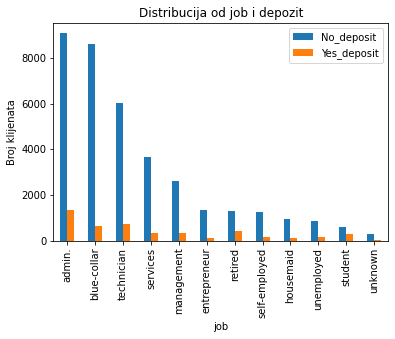

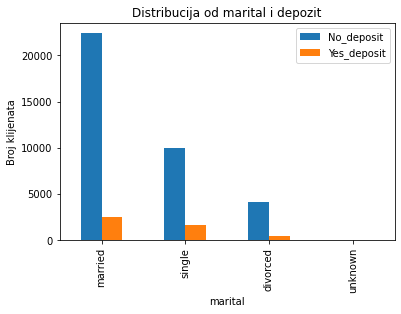

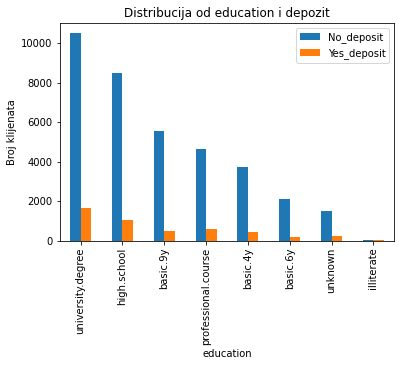

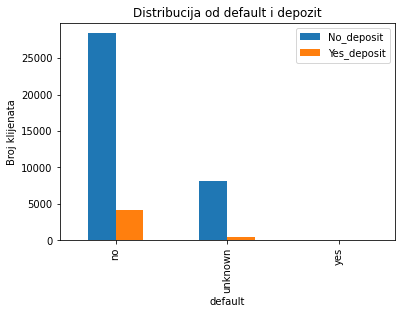

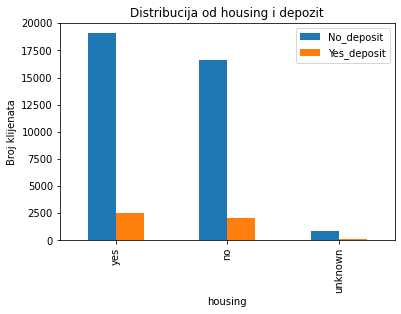

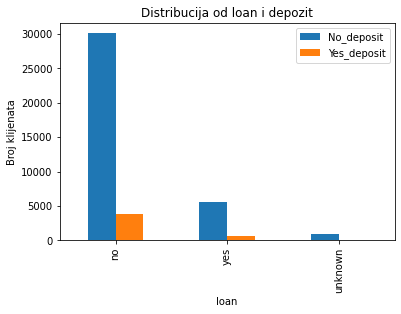

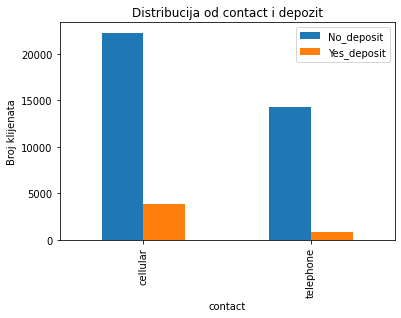

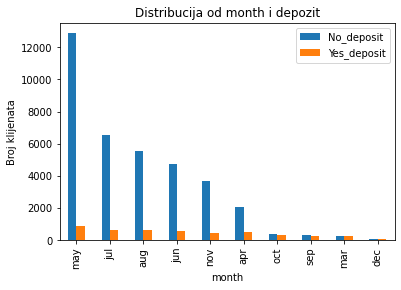

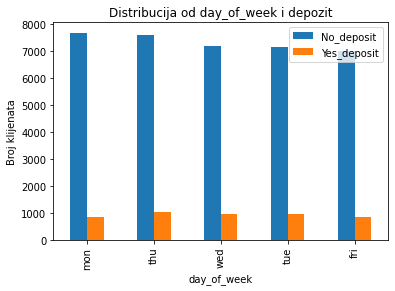

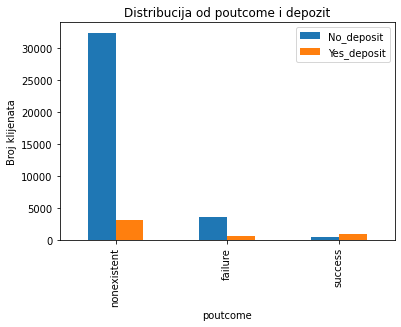

In [ ]:
for item in data_object:
  plot_bar(item)

Primarna analiza nekih značajki pojedinih sutpaca:
* vidimo da depozit najviše oročuje administrativno osoblje i tehnički stučnjaci, a prate ih i umirovljenici i studenti  
* iako oženjeni najviše oročuju depozit, u broju ima i jako puno sama koji to čine
* vidimo da oni kojima je deafult=='yes', odnosno koji imaju nepodmirenu ratu kredita više od 60 dana, ne oročuju depozit
* čini se da stambeni kredit ne utječe puno na to hoće li klijent oročiti ili ne depozit
* razlika je vidljiva među klijentima koji su uzeli zajam i onih koji nisu
* najbolji način komunikacije je preko mobitela

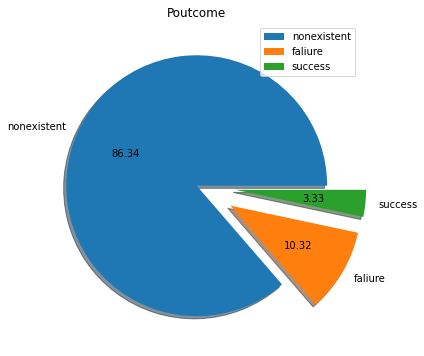

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=data['poutcome'].value_counts(),explode =[0 ,0.3, 0.3] ,autopct ='%.2f'
        ,shadow = True,pctdistance =0.6
,labels = ['nonexistent', 'faliure','success',] ,labeldistance=1.1, data=data)
plt.title('Poutcome')
plt.legend()


Gornjim grafom sam htjela vijdeti koliko su ishodi prethodnih kampanja utjecali na ishod ove i vidimo da od onih koji su sudjelovali u prethodnim kampanjama oko 76% ih nije pristalo na oročenje depozita.

###Numeričke varijable

In [ ]:
# pretvorit ćemo target value tj. y u numerički tip podatka
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
data_num=data_int+data_float
len(data_num)

10

Možemo vidjeti i distribuciju numeričkih varijabli.

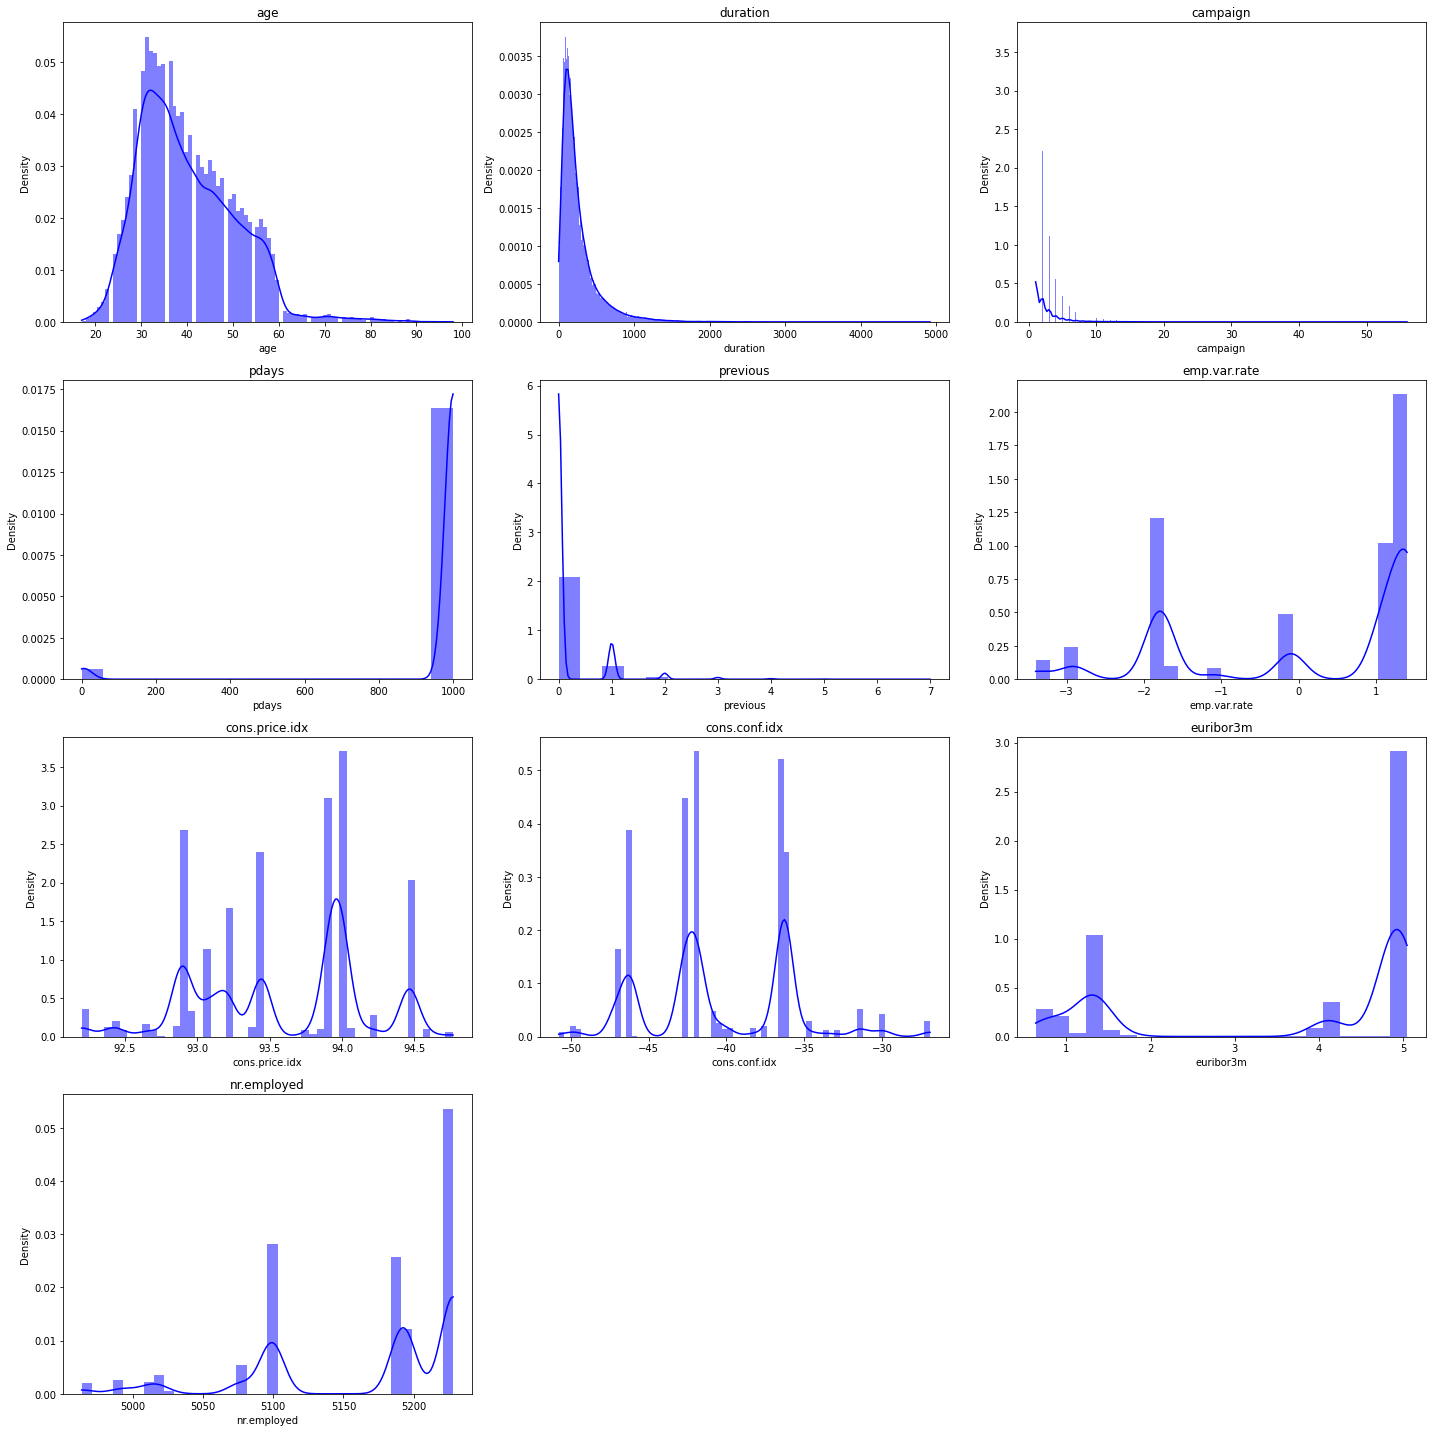

In [ ]:
data_num=data_int+data_float
plt.figure(figsize=(20,20))

for i in range(len(data_num)):
    plt.subplot(4,3, i+1)
    sns.histplot(data[data_num[i]], color = 'b', kde=True, stat="density", linewidth=0);
    plt.title(data_num[i])
plt.tight_layout()

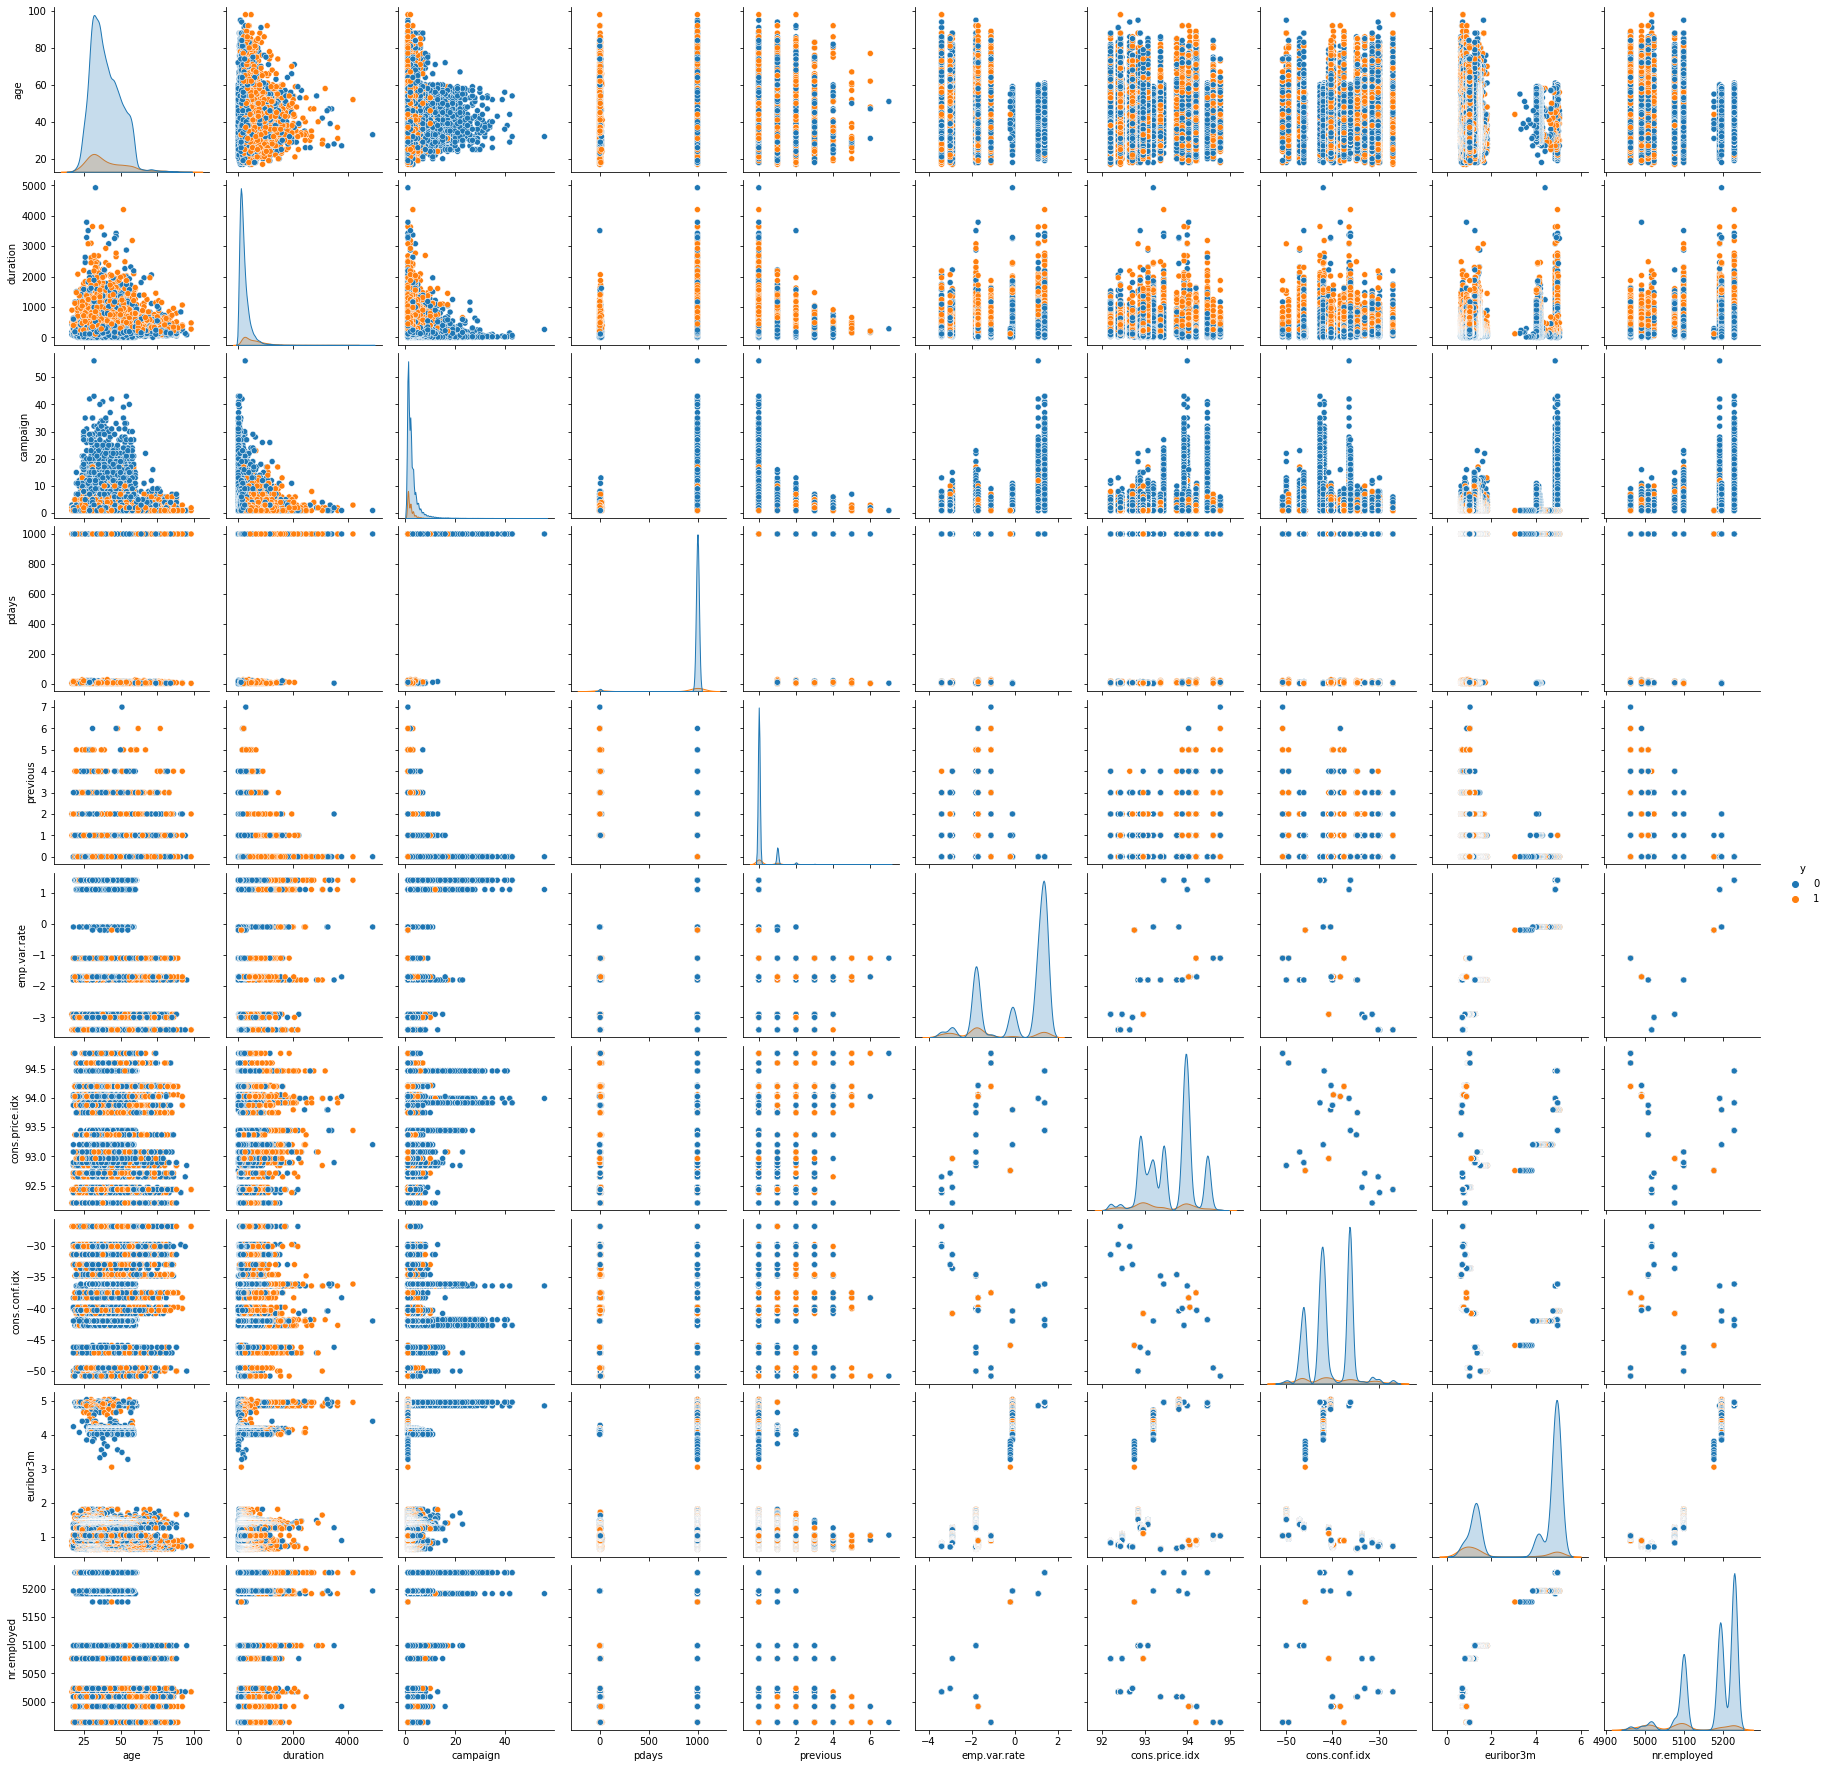

In [ ]:
sns.pairplot(data=data,hue='y')
plt.show()

In [ ]:
# prikazat ćemo matricu korealacije među numeričkim podacima
matrica_korelacije=data.corr()
matrica_korelacije.style.background_gradient(cmap='PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


Vrijednosti u matrici korealcije nam govore o povezanosti (korelaciji) među vrijednostima i kakva je ta korelacija. Ako je broj negativan to znači da su vrijesnoti negoativno korelirani, odnosno ako se jedna vrijenosti poveća, druga će se smanjiti i što je broj bliži -1 ta je korelacija veća. Ako je broj pozitivan, to znači da se povećanjem jedne vrijednosti povećava i druga i to što je broj bliži 1 to je korelacija veća.
<br>
<br>
Na primjer vidimo da su **y** i **campaign** negativno korelirani što znači ako je broj kontakata veći, vjerojatnost da će klijent oročiti depozit je manja, dok su **y** i **previous** pozitivno korelirai, što znači da što je veći broj kontakata prije ove kampanje, to je veća vjerojatnost da će klijent oročiti depozit veća.
<br>
<br>
Vidimo da je **duration** najkoreliranija s ciljanom vrijednosti **y**, stoga ćemo kasnije prije iplementacije algoritma skalirati podatke kako bi smanjili korelaciju.

In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

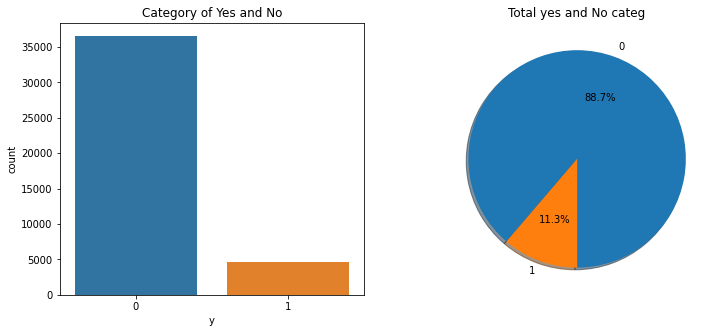

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=data)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

In [ ]:
data_num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

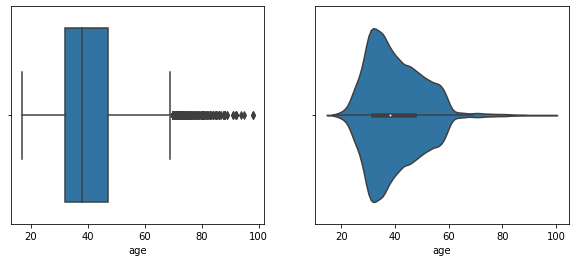

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='age',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='age',data=data)

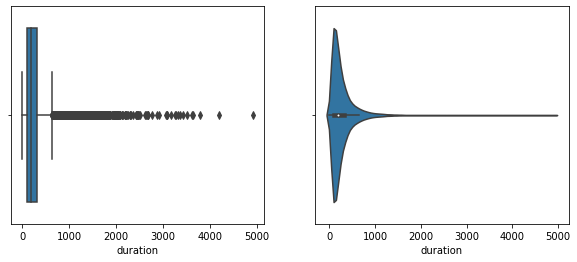

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='duration',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='duration',data=data)

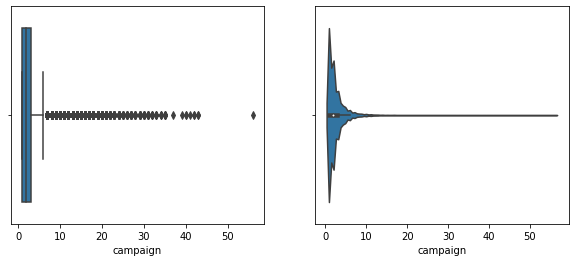

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='campaign',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='campaign',data=data)

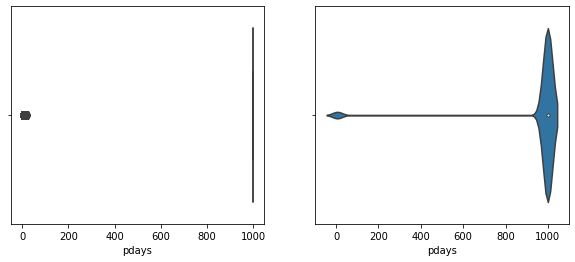

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='pdays',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='pdays',data=data)

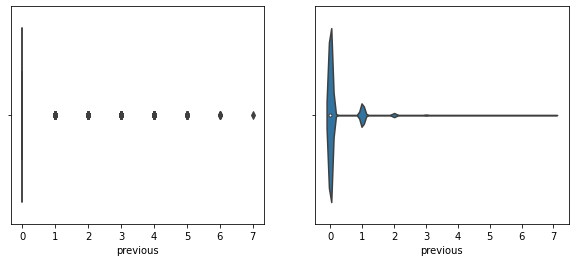

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='previous',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='previous',data=data)

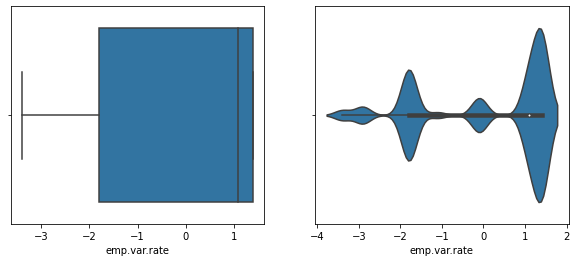

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='emp.var.rate',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='emp.var.rate',data=data)

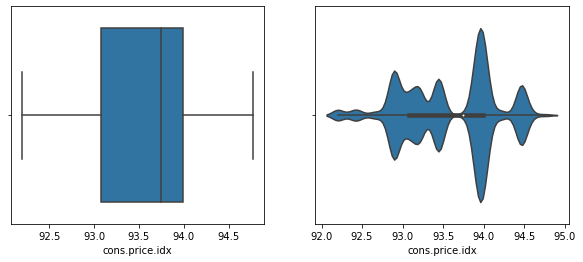

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cons.price.idx',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='cons.price.idx',data=data)

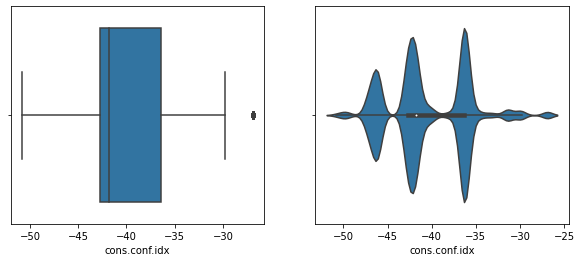

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cons.conf.idx',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='cons.conf.idx',data=data)

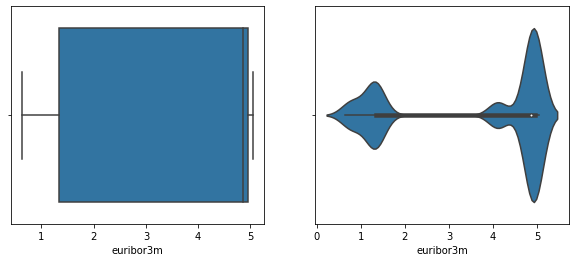

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='euribor3m',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='euribor3m',data=data)

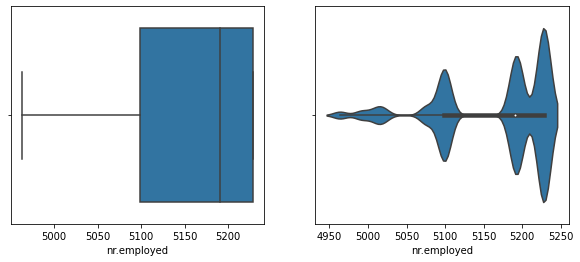

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='nr.employed',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='nr.employed',data=data)

Vidimo da kod nekih stupaca imamo dosta outliera kao npr **age, duration, campaign, pdays, previous**.
<br>Promijenti ćemo varijablu **pdays** zbog pravila da ukoliko klijent nije bio prethodno kontaktiran vrijenost navedene varijable je 999, što nije bilzu ostalih vrijednosti stoga ćemo tako riješiti problem outliera kod te varijable. Stoga ćemo to u idućemo koraku promijeniti, odnosno vrijednosti 999 ćemo zamijeniti s 0.

##Outlieri

In [ ]:
data.pdays = data.pdays.replace(999, 0) # 0 ako je bilo 999

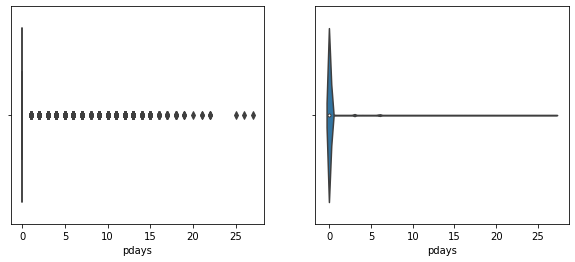

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='pdays',data=data)
plt.subplot(1,2,2)
sns.violinplot(x='pdays',data=data)

**Što napraviti s outlierima?** Ja sam ih odlučila u ovom slučaju zadržati jer vidim da ako za neke varijable ukolim outliere neću imati dobar skup podataka, kao npr. kod varijable pdays jer vidimo nakon što smo zamijenili vrijednost 999 a 0 da su sam sve vrijednosti osim 0 outlieri toga ako ih uklonimo ova varijabla će imati samo vrijenost 0 što nije dobro.

In [ ]:
for features in data_num:
    mean=data[features].mean(axis=0)
    std=data[features].std(axis=0)
    upper_thres=mean+3*std
    lower_thres=mean-3*std
    outliers=0
    for i in range(data.shape[0]):
        if data[features].iloc[i]>=upper_thres or data[features].iloc[i]<=lower_thres:
            outliers+=1
    print("{features}->>  outliers: {outlier}".format(features=features,outlier=outliers))

age->>  outliers: 369
duration->>  outliers: 861
campaign->>  outliers: 869
pdays->>  outliers: 856
previous->>  outliers: 1064
emp.var.rate->>  outliers: 0
cons.price.idx->>  outliers: 0
cons.conf.idx->>  outliers: 0
euribor3m->>  outliers: 0
nr.employed->>  outliers: 0


##Priprema podataka

Budući da kategoričke varijable dominiraju skupom podataka, a broj slabo koreliranih numeričkih varijabli nije veći od 4, moramo transformirati kategoričke varijable kako bismo povećali sposobnost modela da generalizira podatke. (ne možemo ih ispustiti).
Stoga ćemo kategoričke varijable promijeniti ili u binarne ili u numeričke.

In [ ]:
#data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

In [ ]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
data.contact = data.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8')
data.loan = data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data.housing = data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data.default = data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')

data.marital = data.marital.map({'married':2, 'single':1, 'divorced':3, 'unknown':0}).astype('uint8')

data.education = data.education.map({'unknown':0,'basic.4y':1,  'basic.6y':2, 'basic.9y':3,'high.school':4,
       'professional.course':5, 'university.degree':6,
       'illiterate':7}).astype('uint8')
data.previous = data.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') # binarno -  0: nije bilo kontatka, 1: bilo je


data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8')


In [ ]:
data.job=data.job.map({'unknown':0, 'student':1,'housemaid':2, 'services':3, 'admin.':4, 'blue-collar':5, 'technician':6,
                       'management':7, 'unemployed':8, 'self-employed':9, 'entrepreneur':10,'retired':11})

In [ ]:
data.drop(['month', 'day_of_week'], axis=1, inplace=True)

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,2,1,1,0,0,0,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,2,4,0,0,0,0,149,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,2,4,1,1,0,0,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,4,2,2,1,0,0,0,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,2,4,1,0,1,0,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,2,5,1,1,0,1,334,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,5,2,5,1,0,0,1,383,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,11,2,6,1,1,0,1,189,2,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,6,2,5,1,0,0,1,442,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# Uklanjamo duplokate
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(41175, 19)

Sada **duration** dijelimo u 5 kategorija ( znamo da su y i duration korelirani).

In [ ]:
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 645), 'duration'] = 4
    data.loc[data['duration']  > 645, 'duration'] = 5
    return data
duration(data);

Sada ćemo varijable **marital** i  **eduacion** transformirati pomoću target encodera.

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,2,1,1,0,0,0,3,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,2,4,0,0,0,0,2,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,2,4,1,1,0,0,3,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,4,2,2,1,0,0,0,2,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,2,4,1,0,1,0,3,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,2,5,1,1,0,1,4,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,5,2,5,1,0,0,1,4,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,11,2,6,1,1,0,1,3,2,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,6,2,5,1,0,0,1,4,1,0,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


##KNN

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12349,30,3,1,4,1,1,0,0,5,3,0,0,0,1.4,93.918,-42.7,4.959,5228.1
18757,28,6,1,5,1,0,0,1,1,5,0,0,0,1.4,93.918,-42.7,4.968,5228.1
31281,31,5,2,2,0,0,0,1,1,1,0,0,0,-1.8,92.893,-46.2,1.334,5099.1
3316,35,4,1,6,1,0,0,0,2,1,0,0,0,1.1,93.994,-36.4,4.860,5191.0
21968,36,6,2,5,1,0,0,1,3,1,0,0,0,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,24,8,1,6,1,0,1,0,2,2,0,0,0,1.1,93.994,-36.4,4.857,5191.0
11286,60,10,2,1,1,0,0,0,1,3,0,0,0,1.4,94.465,-41.8,4.961,5228.1
38170,29,4,1,6,1,1,0,1,1,1,0,0,0,-3.4,92.431,-26.9,0.754,5017.5
860,40,7,2,6,1,1,0,0,3,2,0,0,0,1.1,93.994,-36.4,4.856,5191.0


In [ ]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.fit_transform(x_val)
y_train_scaled=scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_val_scaled=scaler.fit_transform(np.array(y_val).reshape(-1,1))


In [ ]:
kmeans = KMeans(2) # samo dva klastera jer imamo samo dvije izlazne vrijednosti 0 ili 1
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[-3.03616604e-02,  8.20777441e-03, -1.27419225e-01,
         4.26868638e-02,  2.64629144e-01,  8.14930217e-02,
         2.46027821e-03,  5.62145931e-01,  8.07807344e-02,
        -1.76943412e-01,  3.14548628e-01,  7.35722222e-01,
         3.56142144e-01, -1.29600041e+00, -9.33274505e-01,
        -4.55464812e-01, -1.33999299e+00, -1.24081099e+00,
         3.92388200e-01],
       [ 1.58337933e-02, -4.28040501e-03,  6.64499121e-02,
        -2.22614629e-02, -1.38005732e-01, -4.24991137e-02,
        -1.28305027e-03, -2.93162572e-01, -4.21276515e-02,
         9.22770814e-02, -1.64039051e-01, -3.83683679e-01,
        -1.85730326e-01,  6.75872211e-01,  4.86708414e-01,
         2.37527710e-01,  6.98814614e-01,  6.47090589e-01,
        -2.04632868e-01]])

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data.columns] )
cluster_centers

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.030362,0.008208,-0.127419,0.042687,0.264629,0.081493,0.002460,0.562146,0.080781,-0.176943,0.314549,0.735722,0.356142,-1.296000,-0.933275,-0.455465,-1.339993,-1.240811,0.392388
1,0.015834,-0.004280,0.066450,-0.022261,-0.138006,-0.042499,-0.001283,-0.293163,-0.042128,0.092277,-0.164039,-0.383684,-0.185730,0.675872,0.486708,0.237528,0.698815,0.647091,-0.204633


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data.columns])
cluster_centers

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.109408,0.121907,0.077953,0.133081,0.205008,0.145657,0.120044,0.301427,0.145426,0.061903,0.221186,0.357679,0.234665,-0.300759,-0.183208,-0.028359,-0.315017,-0.282874,0.246412
1,0.124379,0.117860,0.140782,0.112033,0.074522,0.105474,0.118831,0.024239,0.105594,0.149152,0.066085,-0.005097,0.059056,0.338283,0.276979,0.196225,0.345718,0.328956,0.052930


In [ ]:
Y_kmeans = kmeans.fit_predict(x_val_scaled)

In [ ]:
np.array(y_val)

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
brojac=0
y_1= scaler.inverse_transform(y_val_scaled.reshape(-1,1))
for i in range(len(Y_kmeans)):
  if Y_kmeans[i]!=np.array(y_val)[i]:
    brojac+=1

In [ ]:
brojac

5833